# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
import csv

# Import API key. Use personal API.
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [6]:
# Create function to print a processing log string. 
# Using this function keeps the log printing action within the for loops concise.
def logprint(e,n):
    print("Processing Record " + str(e+1) +"| City :"+ n)

# Determine if estimated duration should be displayed in min or hr. Each call sleeps for 1s after completing.
# If each call was exactly 1s duration, 3600 calls would complete in 1hr(1hr = 3600s). 
# Seconds multiplier adjusted to 1.5 as actual duration >1s.
if len(cities) >= 3600:
    duration = str(round((len(cities) * 1.5)/(60*60), 1))+ "hrs"
else:
    duration = str(round((len(cities)* 1.5)/60, 1))+"min"

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
# Log header
header = '''
Beginning Data Retrieval
Estimated duration: ''' + duration + '''
-----------------------------------'''
print(header)

# INIT lists to store data used to create a DF. The resulting DF will be used for plotting.
city_names = []
cloudiness = []
countries = []
dates = []
humidity = []
lats = []
lngs = []
maxtemps = []
windspeeds = []

# Define unit variable to use in URL formatting.
units = "imperial"
skipped_count = 0

# Track date & time when data requests were made. date_string var be appended to the analysis plots.
# Explored datetime option. settled on this method.
# Ref: https://stackoverflow.com/questions/3961581/in-python-how-to-display-current-time-in-readable-format
date_run = time.strftime('%X %x %Z')
date_string = " Analysis Run on date: " + str(date_run)

for i in range(len(cities)):
    logprint(i,cities[i])
    # Build query URL and request your results in Celsius
    location = cities[i]
    url = "http://api.openweathermap.org/data/2.5/weather?"

    # query_url = "{}appid={}&q={}".format(url,api_key,location)
    # Alternative URL string format^^^ Also works.
    
    # Format URL
    query_url2 = "{}&q={}&appid={}&units={}".format(url,location,api_key,units)
    # Get weather data
    response_json = requests.get(query_url2).json()
    # Add a one second interval between queries to stay within API query limits
    time.sleep(1)
    try:
        city_names.append(response_json["name"])
        cloudiness.append(response_json['clouds']['all'])
        countries.append(response_json['sys']['country'])
        dates.append(response_json['dt'])
        humidity.append(response_json['main']['humidity'])
        lats.append(response_json['coord']['lat'])
        lngs.append(response_json['coord']['lon'])
        maxtemps.append(response_json['main']['temp_max'])
        windspeeds.append(response_json['wind']['speed'])
    except (KeyError, IndexError):
        # Track count skipped. Log skipped cities.
        skipped_count = skipped_count + 1
        print("City :" + cities[i] + " |Not found.Skipping..Cities Skipped: " + str(skipped_count))
    

    
# Log footer
footer = '''
-----------------------------
Data Retrieval Complete
-----------------------------'''
print(footer)


Beginning Data Retrieval
-----------------------------
Processing Record 1| City :castro
Processing Record 2| City :ponta do sol
Processing Record 3| City :vaini
Processing Record 4| City :tuktoyaktuk
Processing Record 5| City :suntar
Processing Record 6| City :conakry
Processing Record 7| City :henties bay
Processing Record 8| City :zhanakorgan
Processing Record 9| City :kununurra
Processing Record 10| City :wenling
Processing Record 11| City :atuona
Processing Record 12| City :victoria
Processing Record 13| City :san rafael
Processing Record 14| City :vao
Processing Record 15| City :khatanga
Processing Record 16| City :esna
Processing Record 17| City :kapaa
Processing Record 18| City :mataura
Processing Record 19| City :albany
Processing Record 20| City :padang
Processing Record 21| City :busselton
Processing Record 22| City :aksu
Processing Record 23| City :bluff
Processing Record 24| City :thompson
Processing Record 25| City :saleaula
City :saleaula -not found.Skipping...Skip Coun

Processing Record 181| City :nikolskoye
Processing Record 182| City :laranjeiras do sul
Processing Record 183| City :ocampo
Processing Record 184| City :nizhneyansk
City :nizhneyansk -not found.Skipping...Skip Count: 26
Processing Record 185| City :quezon
Processing Record 186| City :dunedin
Processing Record 187| City :palabuhanratu
City :palabuhanratu -not found.Skipping...Skip Count: 27
Processing Record 188| City :ust-shonosha
Processing Record 189| City :falealupo
City :falealupo -not found.Skipping...Skip Count: 28
Processing Record 190| City :tsihombe
City :tsihombe -not found.Skipping...Skip Count: 29
Processing Record 191| City :ikalamavony
Processing Record 192| City :honiara
Processing Record 193| City :port hardy
Processing Record 194| City :wentzville
Processing Record 195| City :nioro
Processing Record 196| City :puerto ayora
Processing Record 197| City :cayambe
Processing Record 198| City :nanakuli
Processing Record 199| City :votkinsk
Processing Record 200| City :saint-

City :toungoo -not found.Skipping...Skip Count: 50
Processing Record 363| City :broken hill
Processing Record 364| City :necochea
Processing Record 365| City :grenaa
Processing Record 366| City :chicaman
Processing Record 367| City :aktash
City :aktash -not found.Skipping...Skip Count: 51
Processing Record 368| City :alofi
Processing Record 369| City :katsuura
Processing Record 370| City :bridgewater
Processing Record 371| City :hay river
Processing Record 372| City :grants pass
Processing Record 373| City :kholtoson
Processing Record 374| City :bairiki
City :bairiki -not found.Skipping...Skip Count: 52
Processing Record 375| City :kaeo
Processing Record 376| City :qingdao
Processing Record 377| City :mujiayingzi
Processing Record 378| City :souillac
Processing Record 379| City :wa
City :wa -not found.Skipping...Skip Count: 53
Processing Record 380| City :plettenberg bay
Processing Record 381| City :otradnoye
Processing Record 382| City :saint paul
Processing Record 383| City :progreso

Processing Record 552| City :dalbandin
Processing Record 553| City :katobu
Processing Record 554| City :marsabit
Processing Record 555| City :kimbe
Processing Record 556| City :sarahan
Processing Record 557| City :oudtshoorn
Processing Record 558| City :rio grande
Processing Record 559| City :neiafu
Processing Record 560| City :karaul
City :karaul -not found.Skipping...Skip Count: 69
Processing Record 561| City :tokamachi
Processing Record 562| City :san patricio
Processing Record 563| City :damietta
Processing Record 564| City :komsomolskiy
Processing Record 565| City :pali
Processing Record 566| City :grand gaube
Processing Record 567| City :kieta
Processing Record 568| City :olafsvik
City :olafsvik -not found.Skipping...Skip Count: 70
Processing Record 569| City :karauzyak
City :karauzyak -not found.Skipping...Skip Count: 71
Processing Record 570| City :waingapu
Processing Record 571| City :ojinaga
Processing Record 572| City :iguape
Processing Record 573| City :zhirnovsk
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
# Build Data frame. 
weather_df = pd.DataFrame({'City':city_names,"Country":countries,"Date":dates,
                          "Lat":lats,"Lng":lngs,"Temp":maxtemps,"Humidity":humidity,
                          "Wind Speed":windspeeds,"Cloudiness":cloudiness})
# Save Data Frame to CSV.
weather_df.to_csv("Weather_Data.csv")
# Display Data Frame.
weather_df.head()

,City,Country,Date,Lat,Lng,Temp,Humidity,Wind Speed,Cloudiness
0,Castro,CL,1553850000,-42.48,-73.76,46.40,100,4.70,90
1,Ponta do Sol,BR,1553852223,-20.63,-46.00,66.28,77,8.23,32
2,Vaini,IN,1553850000,15.34,74.49,98.60,34,5.82,40
3,Tuktoyaktuk,CA,1553852228,69.44,-133.03,22.63,83,6.06,56
4,Suntar,RU,1553851999,62.16,117.65,30.55,58,2.82,48


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,lompoc,1,US,1534984500,44,34.64,-120.46,77.00,11.41
1,klaksvik,92,FO,1534983600,100,62.23,-6.59,50.00,13.87
2,bisignano,0,IT,1534981800,88,39.50,16.27,66.20,5.82
3,hilo,90,US,1534984860,90,19.71,-155.08,77.00,8.05
4,rikitea,8,PF,1534986579,100,-23.12,-134.97,69.58,19.71


In [9]:
# Check counts for any odd discrepancies in data collection.

# DF .count() & len(cities) should return close to equal. If a difference exist, 
# the difference should be equal to the amount of skipped cities(= skipped_count var)
weather_df.count(),print("Cities searched: "+str(len(cities))+ " Total Skipped: "+ str(skipped_count))



Cities searched: 612 Total Skipped: 74


(City          538
 Country       538
 Date          538
 Lat           538
 Lng           538
 Temp          538
 Humidity      538
 Wind Speed    538
 Cloudiness    538
 dtype: int64, None)

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

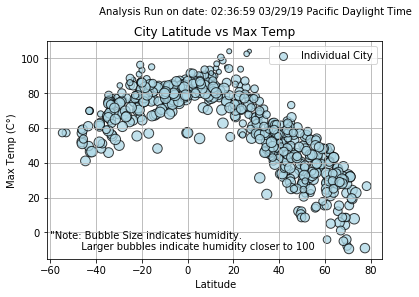

In [143]:
# Plot scatter

plt.scatter(weather_df['Lat'], weather_df['Temp'],s=(weather_df["Humidity"] + 10), color = 'lightblue', edgecolor = 'black', label = 'Individual City', alpha = .75, linewidth = 1)
plt.grid()
plt.title("City Latitude vs Max Temp")
plt.xlabel(" Latitude")
plt.ylabel("Max Temp (C°)")
plt.text(-40,125, date_string)
plt.text(-60,-10, """"Note: Bubble Size indicates humidity.
          Larger bubbles indicate humidity closer to 100""")
plt.legend(loc="best")

# Save figure
plt.savefig("images/Lat_V_Temp.png")


plt.show()

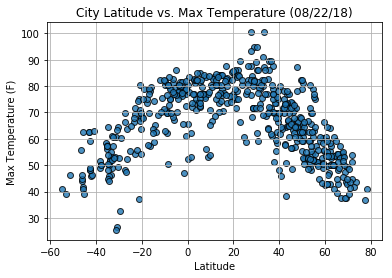

#### Latitude vs. Humidity Plot

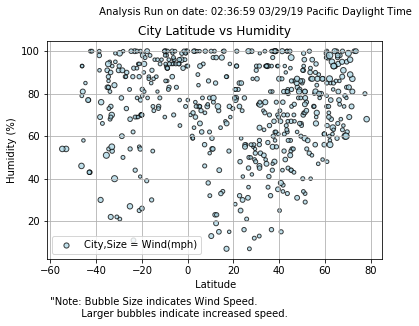

In [142]:
# Plot scatter.
plt.scatter(weather_df['Lat'], weather_df['Humidity'],s=(weather_df["Wind Speed"] + 10), color = 'lightblue', edgecolor = 'black', label = 'City,Size = Wind(mph)', alpha = .75, linewidth = 1)
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel(" Latitude")
plt.ylabel("Humidity (%)")
plt.text(-40,117, date_string)

plt.legend(loc="best")

# Save figure
plt.savefig("images/Lat_V_Humidity.png")
plt.text(-60,-25,""""Note: Bubble Size indicates Wind Speed.
          Larger bubbles indicate increased speed.""")
plt.show()

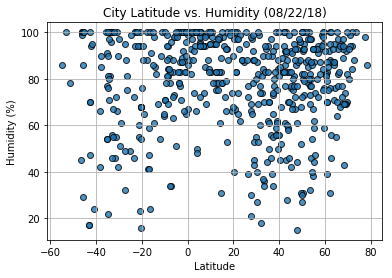

#### Latitude vs. Cloudiness Plot

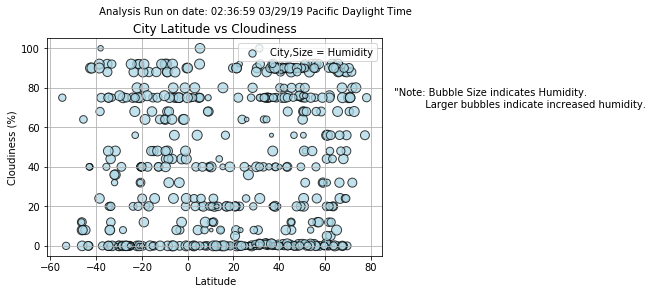

In [141]:
# Plot scatter.
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'],s=weather_df["Humidity"], color = 'lightblue', edgecolor = 'black', label = 'City,Size = Humidity', alpha = .75, linewidth = 1)
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel(" Latitude")
plt.ylabel("Cloudiness (%)")
plt.text(-40,117, date_string)

plt.legend(loc="best")

# Save figure
plt.savefig("images/Lat_V_Cloudiness.png")
plt.text(90,70, """"Note: Bubble Size indicates Humidity.
          Larger bubbles indicate increased humidity.""")
plt.show()

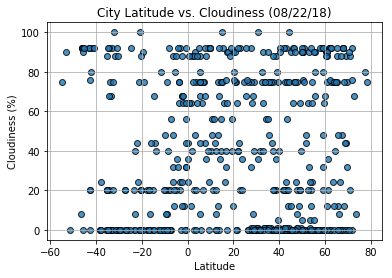

#### Latitude vs. Wind Speed Plot

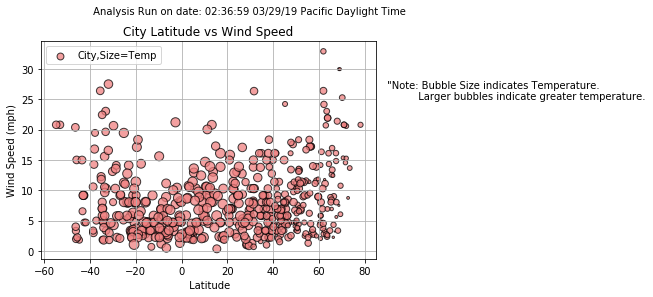

In [139]:
# Plot Scatter.
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'],s=(weather_df["Temp"]), color = 'lightcoral', edgecolor = 'black', label = 'City,Size=Temp', alpha = .75, linewidth = 1)
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel(" Latitude")
plt.ylabel("Wind Speed (mph)")
plt.text(-40,39, date_string)

plt.legend(loc="best")

# Save figure
plt.savefig("images/Lat_V_Windspeed.png")
plt.text(90,25, """"Note: Bubble Size indicates Temperature.
          Larger bubbles indicate greater temperature.""")
plt.show()

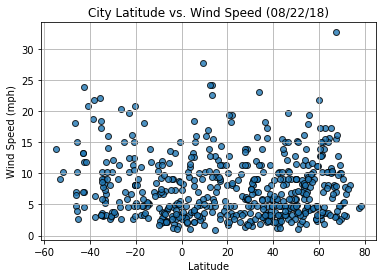